<a href="https://colab.research.google.com/github/Kartika014/Kartika014/blob/main/Walmart_CASE_STUDY.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Walmart Business Case Study

Let's first understand the problem statement.

Use case: The Management team at Walmart Inc. wants to analyze the customer purchase behavior (specifically, purchase amount) against the customer’s gender and the various other factors to help the business make better decisions. They want to understand if the spending habits differ between male and female customers: Do women spend more on Black Friday than men? (Assume 50 million customers are male and 50 million are female).



*   So here we can work more on how varity of features differ on the basis of  customer's gender.
*   On different months what is the behaviour of the customer?
*   How men and women are spending?
*   which city has more of spending nature of man and women? -- This will give us an clarity of where to open more stores.






Let's unleash the features/parameters of the data

1. User_ID:	User ID
2. Product_ID:	Product ID
3. Gender:	Sex of User
4. Age:	Age in bins
5. Occupation:	Occupation
6. City_Category:	Category of the City
7. StayInCurrentCityYears:	Number of years stay in current city
8. Marital_Status:	Marital Status
9. ProductCategory:	Product Category
10. Purchase:	Purchase Amount

Loading the data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
# importing all the neccesary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as slt

In [ ]:
url = '/content/drive/MyDrive/DSML/Lecture notes/Probability and Stats (Module - 9)/walmart_data.csv'.format("1R1ySSuiY6EMdK3GqHP5oUR1KKKToRRNO")
df = pd.read_csv(url)
df

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969
...,...,...,...,...,...,...,...,...,...,...
550063,1006033,P00372445,M,51-55,13,B,1,1,20,368
550064,1006035,P00375436,F,26-35,1,C,3,0,20,371
550065,1006036,P00375436,F,26-35,15,B,4+,1,20,137
550066,1006038,P00375436,F,55+,1,C,2,0,20,365


Let's understand the data

In [ ]:
df[:11]

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969
5,1000003,P00193542,M,26-35,15,A,3,0,1,15227
6,1000004,P00184942,M,46-50,7,B,2,1,1,19215
7,1000004,P00346142,M,46-50,7,B,2,1,1,15854
8,1000004,P0097242,M,46-50,7,B,2,1,1,15686
9,1000005,P00274942,M,26-35,20,A,1,1,8,7871


In [ ]:
df.shape
# rows: 550068
# columns: 10 (basically we are having 10 features )

(550068, 10)

In [ ]:
df.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category',
       'Purchase'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     550068 non-null  int64 
 1   Product_ID                  550068 non-null  object
 2   Gender                      550068 non-null  object
 3   Age                         550068 non-null  object
 4   Occupation                  550068 non-null  int64 
 5   City_Category               550068 non-null  object
 6   Stay_In_Current_City_Years  550068 non-null  object
 7   Marital_Status              550068 non-null  int64 
 8   Product_Category            550068 non-null  int64 
 9   Purchase                    550068 non-null  int64 
dtypes: int64(5), object(5)
memory usage: 42.0+ MB


Here we can easily understand the data

*  User_ID,occupation,marital_status, product_category, purchase are of integer data type and else other are string data type.

* There is no null value

**Let's undertand some basic information about the data**

checking missing value

checking duplicates in data

unique data in column



In [ ]:
# missing value
df.isnull().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category              0
Purchase                      0
dtype: int64

In [ ]:
df.duplicated().sum()
# there is no duplicates

0

In [ ]:
df.nunique()

User_ID                        5891
Product_ID                     3631
Gender                            2
Age                               7
Occupation                       21
City_Category                     3
Stay_In_Current_City_Years        5
Marital_Status                    2
Product_Category                 20
Purchase                      18105
dtype: int64

Statistical Summary

In [ ]:
df.describe()

,User_ID,Occupation,Marital_Status,Product_Category,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,23961.000000


In [ ]:
df.describe(include = "object") # for string (data)

,Product_ID,Gender,Age,City_Category,Stay_In_Current_City_Years
count,550068,550068,550068,550068,550068
unique,3631,2,7,3,5
top,P00265242,M,26-35,B,1
freq,1880,414259,219587,231173,193821


In [ ]:
round(df["Gender"].value_counts(normalize = True)*100,2)

M    75.31
F    24.69
Name: Gender, dtype: float64

 Observation: Males have higher percentage of buying than females. So if we see the population we can clearly categorize that we can prefer more males than females

In [ ]:
round(df["City_Category"].value_counts(normalize = True) *100,2)

B    42.03
C    31.12
A    26.85
Name: City_Category, dtype: float64

Observation--- B city has higher number of sales so here we can target more customers

In [ ]:
df_gender = pd.DataFrame(df.groupby(by = ['Gender'])['User_ID'].nunique()).reset_index().rename(columns = {'User_ID' : 'id'})
df_gender['total_%'] = np.round(df_gender['id'] / df_gender['id'].sum() * 100, 2)
df_gender

,Gender,id,total_%
0,F,1666,28.28
1,M,4225,71.72


In [ ]:
df_city = pd.DataFrame(df.groupby(by = ['City_Category',"Gender"])['Purchase'].sum()).reset_index().rename(columns = {'Purchase' : 'Total_Purchase_amount'})
df_city['total_%'] = np.round(df_city['Total_Purchase_amount'] / df_city['Total_Purchase_amount'].sum() * 100, 2)
df_city

,City_Category,Gender,Total_Purchase_amount,total_%
0,A,F,306329915,6.01
1,A,M,1010141746,19.82
2,B,F,493617008,9.69
3,B,M,1621916597,31.83
4,C,F,386285719,7.58
5,C,M,1277521757,25.07


Observation--- Here we can clearly observe the revenue generated by  male and female per city. we can clearly target the customers in accordingly in following region like in
*  city A we can say that in total male have spent more than females
*  city B we can say that in total male have spent more than females
*  city C we can say that in total male have spent more than females

So in general males have spent more on females.

In [ ]:
round(df["Marital_Status"].value_counts(normalize = True)* 100,2)

0    59.03
1    40.97
Name: Marital_Status, dtype: float64

 Transactions made by each gender category

In [ ]:
df.groupby(by = ['Gender'])['User_ID'].count().reset_index()


,Gender,User_ID
0,F,135809
1,M,414259


In [ ]:
print('Average number of transactions made by each Male on Black Friday is', round(414259 / 4225))
print('Average number of transactions made by each Female on Black Friday is', round(135809 / 1666))

Average number of transactions made by each Male on Black Friday is 98
Average number of transactions made by each Female on Black Friday is 82


Average Revenue by each Gender per transaction

In [ ]:
pd.DataFrame(df.groupby(by = 'Gender')['Purchase'].mean()).reset_index().rename(columns = {'Purchase' : 'Average_Purchase'})


,Gender,Average_Purchase
0,F,8734.565765
1,M,9437.526040


Observation--- we can clearly observe that Average purchase of males is quite close to females so we can somehow improve it

Now let's change the column of Maritial status

In [ ]:
df['Marital_Status'] = df['Marital_Status'].apply(lambda x: 'Married' if x == 1 else 'Single')

In [ ]:
df['Marital_Status'] = df['Marital_Status'].astype('category')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype   
---  ------                      --------------   -----   
 0   User_ID                     550068 non-null  int64   
 1   Product_ID                  550068 non-null  object  
 2   Gender                      550068 non-null  object  
 3   Age                         550068 non-null  object  
 4   Occupation                  550068 non-null  int64   
 5   City_Category               550068 non-null  object  
 6   Stay_In_Current_City_Years  550068 non-null  object  
 7   Marital_Status              550068 non-null  category
 8   Product_Category            550068 non-null  int64   
 9   Purchase                    550068 non-null  int64   
dtypes: category(1), int64(4), object(5)
memory usage: 38.3+ MB


Observation--- This will help us do further computation easily and further we can reduce the menory . After doing data.info we can clearly see that earlier the memory was 42.something and now it is being reduced to 38.something.

In [ ]:
df.groupby(by = ['Marital_Status'])['User_ID'].count()

Marital_Status
Married    225337
Single     324731
Name: User_ID, dtype: int64

Observation-- Married people in total have made less transaction than single

In [ ]:
df_marital= pd.DataFrame(df.groupby(by = ['Marital_Status'])['User_ID'].nunique()).reset_index().rename(columns = {'User_ID' : 'unique_customers'})
df_marital['percent_share'] = np.round(df_marital['unique_customers'] / df_marital['unique_customers'].sum() * 100, 2)
df_marital

,Marital_Status,unique_customers,percent_share
0,Married,2474,42.0
1,Single,3417,58.0


In [ ]:
print('Average number of transactions made by each user with marital status Married is', round(225337 / 2474))
print('Average number of transactions made by each with marital status Single is', round(324731 / 3417))

Average number of transactions made by each user with marital status Married is 91
Average number of transactions made by each with marital status Single is 95


In [ ]:
df_marital_revenue = df.groupby(by = ['Marital_Status'])['Purchase'].sum().to_frame().sort_values(by = 'Purchase', ascending = False).reset_index()
df_marital_revenue['percent_share'] = np.round((df_marital_revenue['Purchase'] / df_marital_revenue['Purchase'].sum()) * 100, 2)
df_marital_revenue

,Marital_Status,Purchase,percent_share
0,Single,3008927447,59.05
1,Married,2086885295,40.95


Observation: maximum revenue generated by walmart is from the customers who are single

<Axes: xlabel='Age', ylabel='Count'>

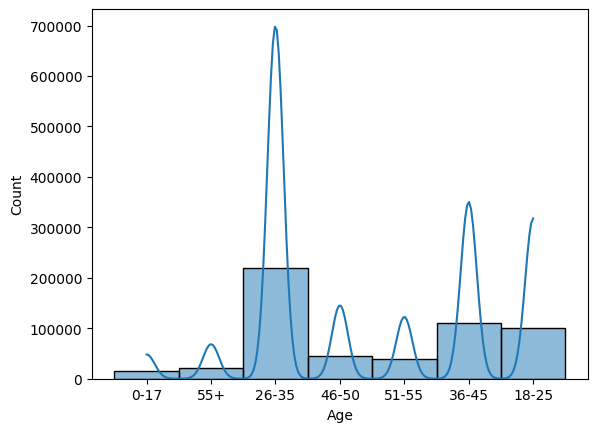

In [ ]:
sns.histplot(data=df, x="Age", kde=True)

Observation: Age between 26-35 have added more to the revenue of walmart. So we can somehow target the audiance who have age between 26-35

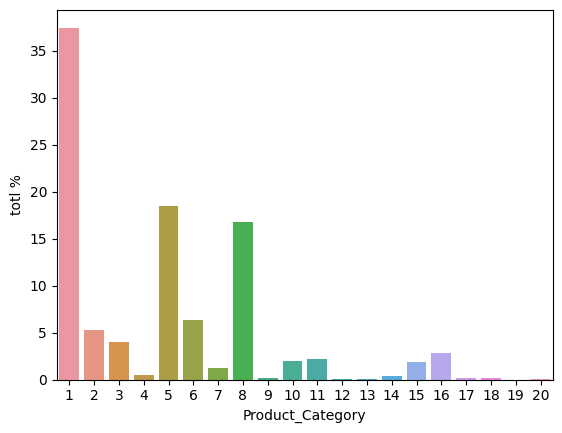

In [ ]:
df_product_revenue = df.groupby(by = ['Product_Category'])['Purchase'].sum().to_frame().sort_values(by = 'Purchase', ascending = False).reset_index()
df_product_revenue
df_product_revenue['totl %'] = np.round((df_product_revenue['Purchase'] / df_product_revenue['Purchase'].sum()) * 100, 2)
sns.barplot(data=df_product_revenue, x="Product_Category",y = "totl %")
plt.show()

Observation:  Top 5 categories which are making most profit are 1,5,8,6,2

Let's see distribution for males and females per transaction

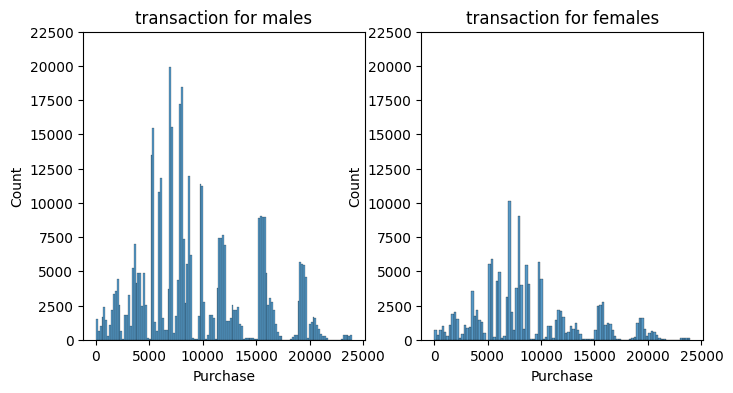

In [ ]:
df_male = df[df['Gender'] == 'M']
df_female = df[df['Gender'] == 'F']
plt.figure(figsize = (8, 4))
plt.subplot(1, 2, 1)
plt.title('transaction for males')
sns.histplot(data = df_male, x = 'Purchase')
plt.yticks(np.arange(0, 22550, 2500))
plt.subplot(1, 2 ,2)
plt.title('transaction for females')
sns.histplot(data = df_female, x = 'Purchase')
plt.yticks(np.arange(0, 22550, 2500))
plt.show()

Observation: Males have spend around 5k to 10k. even females follow the same trend line but for number of females are less.

In [ ]:
df_cust_gender = pd.DataFrame(df.groupby(by = ['Gender', 'User_ID'])['Purchase'].sum()).reset_index().rename(columns = {'Purchase' : 'Total_Purchase'})
df_male = df_cust_gender.loc[df_cust_gender['Gender'] == 'M']
df_female = df_cust_gender.loc[df_cust_gender['Gender'] == 'F']

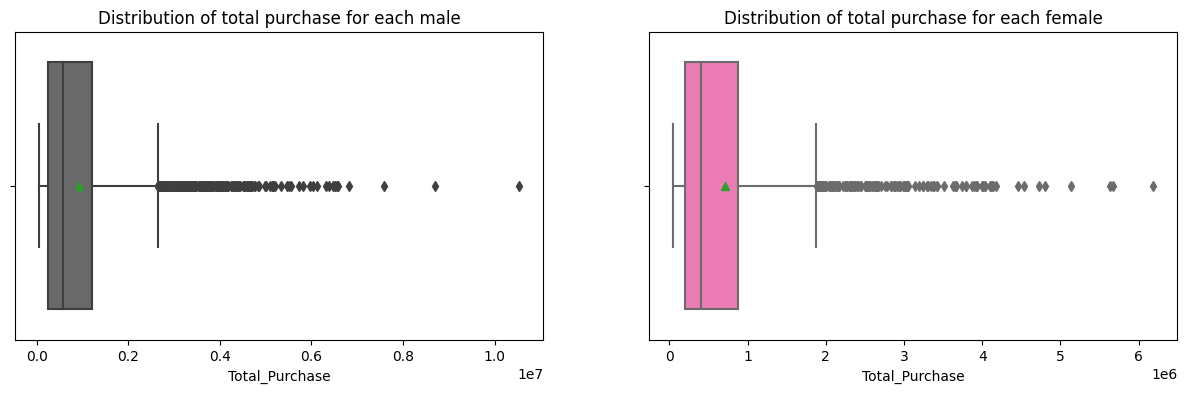

In [ ]:
plt.figure(figsize = (15, 4))
plt.subplot(1, 2, 1)
plt.title('Distribution of total purchase for each male')
sns.boxplot(data = df_male, x = 'Total_Purchase', showmeans = True, color = 'dimgray')
plt.subplot(1, 2 ,2)
plt.title('Distribution of total purchase for each female')
sns.boxplot(data = df_female, x = 'Total_Purchase', showmeans = True, color = 'hotpink')
plt.show()

Observations: Females have more outliers than males

[]

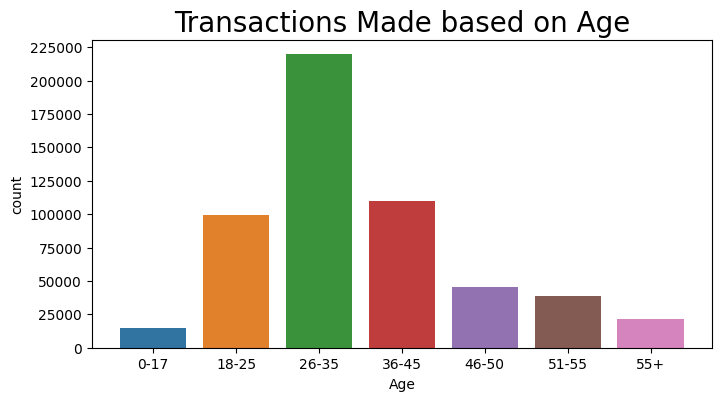

In [ ]:
plt.figure(figsize = (8, 4))
plt.title('Transactions Made based on Age',
          fontsize = 20)
plt.yticks(np.arange(0, 250001, 25000))
sns.countplot(data = df, x = 'Age',
              order = ['0-17', '18-25', '26-35', '36-45', '46-50', '51-55', '55+'])
plt.plot()

[]

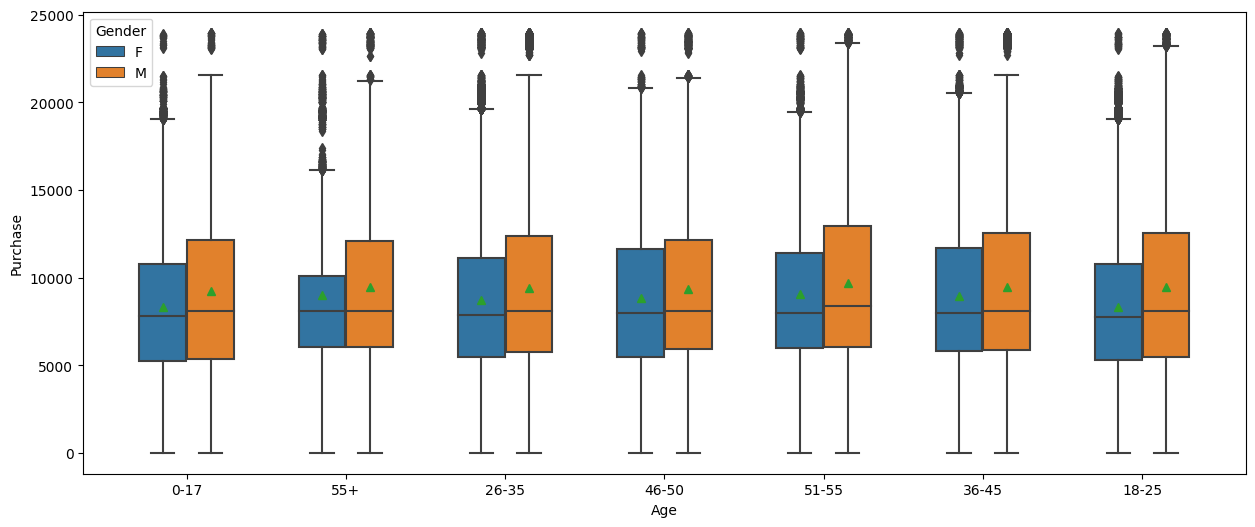

In [ ]:
plt.figure(figsize = (15, 6))
sns.boxplot(data = df, x = 'Age', y = 'Purchase', hue = 'Gender', showmeans = True, width = 0.6)
plt.plot()

Observation: Females age above 55 have more outliers in data

[]

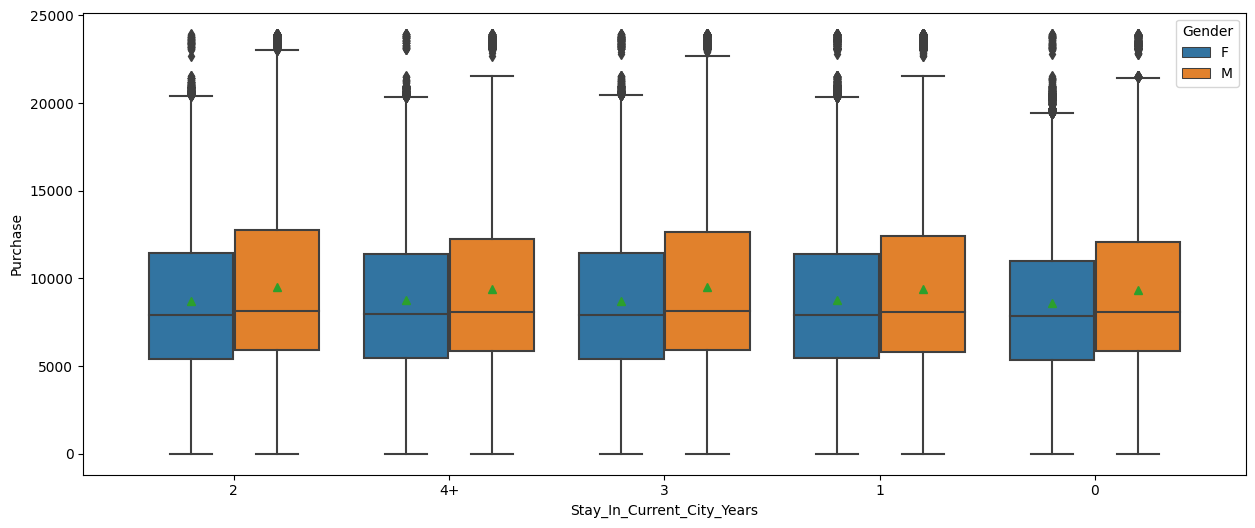

In [ ]:
plt.figure(figsize = (15, 6))
sns.boxplot(data = df, x = 'Stay_In_Current_City_Years', y = 'Purchase', hue = 'Gender', showmeans = True)
plt.plot()

Understanding the mean purchase made by each user

Females

In [ ]:
df_female

,Gender,User_ID,Total_Purchase
0,F,1000001,334093
1,F,1000006,379930
2,F,1000010,2169510
3,F,1000011,557023
4,F,1000016,150490
...,...,...,...
1661,F,1006035,956645
1662,F,1006036,4116058
1663,F,1006037,1119538
1664,F,1006038,90034


Lets take sample size as 1500 and we will do this experiment 3000 times

In [ ]:
means = []
for sample_size in range(1000):
    sample_mean = df_female['Total_Purchase'].sample(1500).mean()
    means.append(sample_mean)

[]

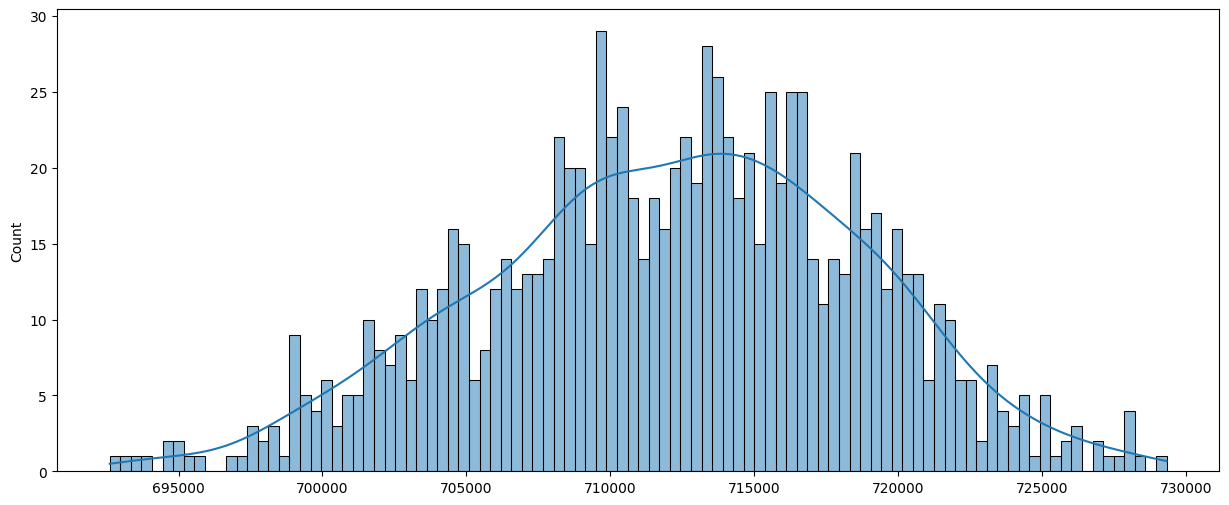

In [ ]:
plt.figure(figsize = (15, 6))
sns.histplot(means, kde = True, bins = 100)
plt.plot()

In [ ]:
sample_mean = np.mean(means)
sample_std = np.std(means)
sample_mean, sample_std
purchase_95 = sample_mean + slt.norm.ppf(0.025)* sample_std, sample_mean + slt.norm.ppf(0.975)* sample_std
purchase_95
purchase_99 = sample_mean + slt.norm.ppf(0.005)* sample_std, sample_mean + slt.norm.ppf(0.995)* sample_std
purchase_99

Observation: Now while determining mean accross 95 and 99% confidence interval we can clearly see an overlap

For males

In [ ]:
means = []
for sample_size in range(1000):
    sample_mean = df_male['Total_Purchase'].sample(4000).mean()
    means.append(sample_mean)

[]

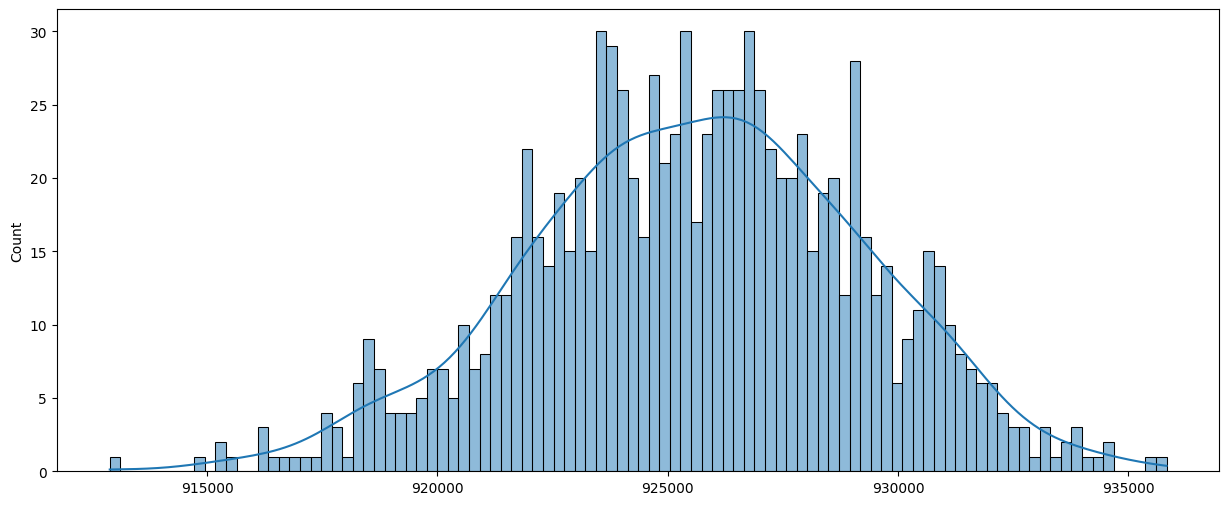

In [ ]:
plt.figure(figsize = (15, 6))
sns.histplot(means, kde = True, bins = 100)
plt.plot()

In [ ]:
sample_mean = np.mean(means)
sample_std = np.std(means)
sample_mean, sample_std
purchase_95 = sample_mean + slt.norm.ppf(0.025)* sample_std, sample_mean + slt.norm.ppf(0.975)* sample_std
purchase_99 =  sample_mean + slt.norm.ppf(0.005)* sample_std, sample_mean + slt.norm.ppf(0.995)* sample_std
purchase_95,purchase_99

((918497.757959269, 932675.853464731), (916270.2177135593, 934903.3937104407))

Married vs Unmarried

In [ ]:
df_single = df.loc[df['Marital_Status'] == 'Single']
df_married = df.loc[df['Marital_Status'] == 'Married']

In [ ]:
df_single = df_single.groupby('User_ID')['Purchase'].sum().to_frame().reset_index().rename(columns = {'Purchase' : 'Total_Purchase'})
df_married = df_married.groupby('User_ID')['Purchase'].sum().to_frame().reset_index().rename(columns = {'Purchase' : 'Total_Purchase'})


**Unmarried** : we are taking a sample size for 1000

In [ ]:
means = []
for sample_size in range(1000):
    sample_mean = df_single['Total_Purchase'].sample(3000).mean()
    means.append(sample_mean)

[]

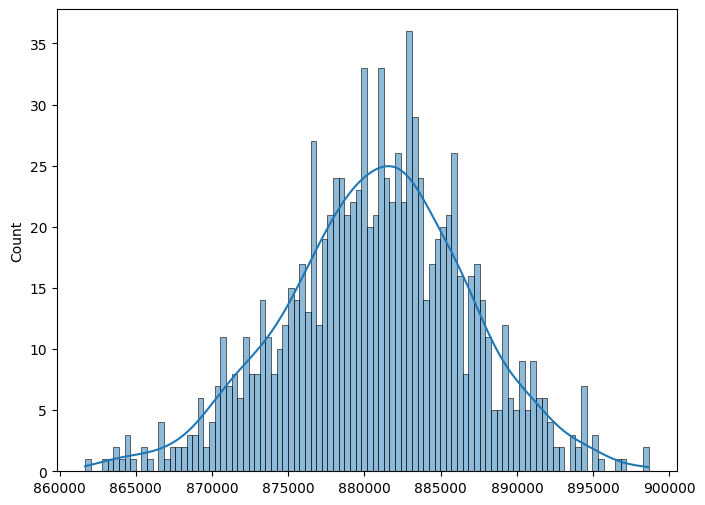

In [ ]:
plt.figure(figsize = (8, 6))
sns.histplot(means, kde = True, bins = 100)
plt.plot()

In [ ]:
sample_mean = np.mean(means)
sample_std = np.std(means)
sample_mean, sample_std

(880778.9165806667, 6054.021173988002)

In [ ]:
purchase_95 = sample_mean + slt.norm.ppf(0.025)* sample_std, sample_mean + slt.norm.ppf(0.975)* sample_std
purchase_99 = sample_mean + slt.norm.ppf(0.005)* sample_std, sample_mean + slt.norm.ppf(0.995)* sample_std
purchase_95,purchase_99

((868913.2531180073, 892644.580043326), (865184.7914364028, 896373.0417249305))

For married

[]

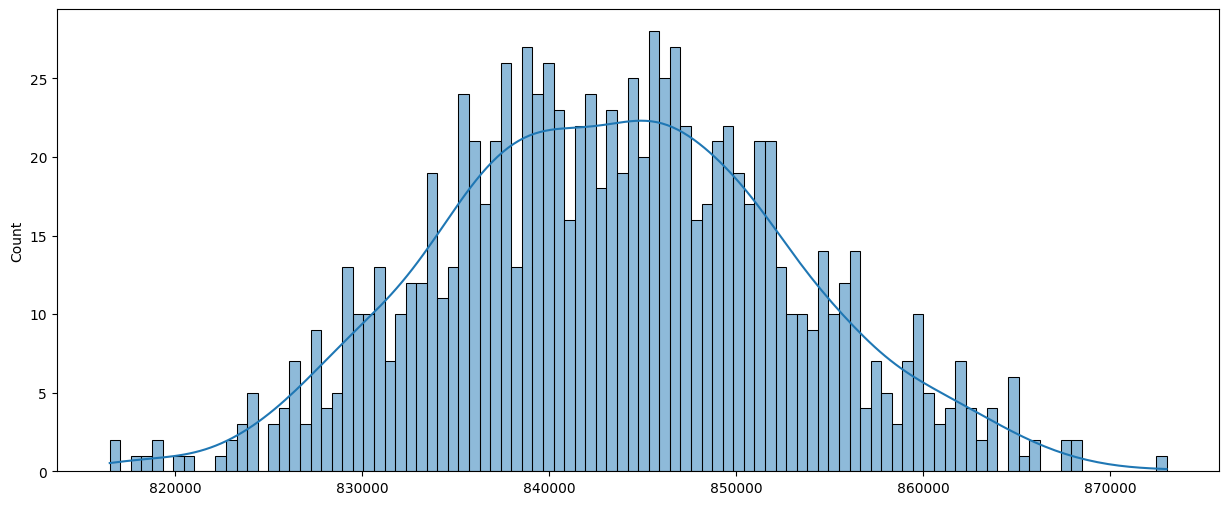

In [ ]:
means = []
for sample_size in range(1000):
    sample_mean = df_married['Total_Purchase'].sample(2000).mean()
    means.append(sample_mean)
plt.figure(figsize = (15, 6))
sns.histplot(means, kde = True, bins = 100)
plt.plot()

In [ ]:
sample_mean = np.mean(means)
sample_std = np.std(means)
sample_mean, sample_std

(843452.6440104999, 9357.628633210006)

In [ ]:
purchase_95 = sample_mean + slt.norm.ppf(0.025)* sample_std, sample_mean + slt.norm.ppf(0.975)* sample_std
purchase_99 = sample_mean + slt.norm.ppf(0.005)* sample_std, sample_mean + slt.norm.ppf(0.995)* sample_std
purchase_95,purchase_99

((825112.0289087076, 861793.2591122923),
 (819348.9899653493, 867556.2980556505))

Let's check on the basis of Age

Here we will be doing for the age which has maximum contribution in the profit of walmart

In [ ]:
df_age_26_to_35 = df.loc[df['Age'] == '26-35']

In [ ]:
df_age_26_to_35 = df_age_26_to_35.groupby(by = 'User_ID')['Purchase'].sum().to_frame().reset_index().rename(columns = {'Purchase' : 'Total_Purchase'})


In [ ]:
df_age_26_to_35

,User_ID,Total_Purchase
0,1000003,341635
1,1000005,821001
2,1000008,796593
3,1000009,594099
4,1000011,557023
...,...,...
2048,1006030,737361
2049,1006034,197086
2050,1006035,956645
2051,1006036,4116058


Here we will take sample size of 1500

[]

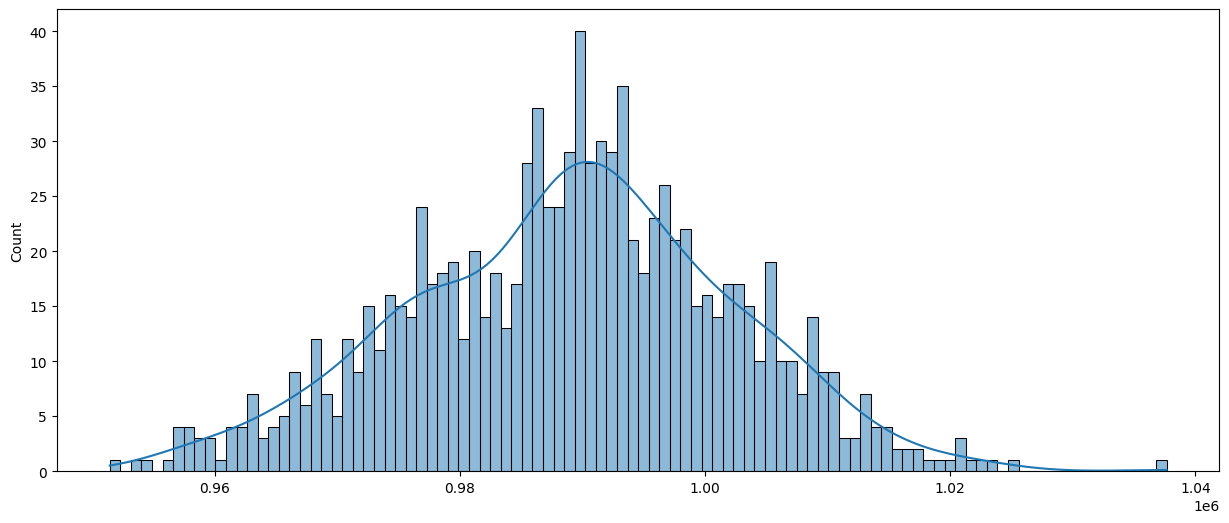

In [ ]:
means = []
for sample_size in range(1000):
    sample_mean = df_age_26_to_35['Total_Purchase'].sample(1500).mean()
    means.append(sample_mean)
plt.figure(figsize = (15, 6))
sns.histplot(means, kde = True, bins = 100)
plt.plot()

In [ ]:
sample_mean = np.mean(means)
sample_std = np.std(means)
sample_mean, sample_std

(988926.424926, 13127.528806920587)

In [ ]:
purchase_95= sample_mean + slt.norm.ppf(0.025)* sample_std, sample_mean + slt.norm.ppf(0.975)* sample_std
purchase_99 = sample_mean + slt.norm.ppf(0.005)* sample_std, sample_mean + slt.norm.ppf(0.995)* sample_std
purchase_95,purchase_99

((963196.9412584235, 1014655.9085935764),
 (955112.1515419516, 1022740.6983100483))

**Insights**

1. There are 1666 unique female customers and 4225 unique male customers.
2. Average number of transactions made by each Male on Black Friday is 98 while for Female it is 82.
3. On an average each male makes a total purchase of 712024.394958 on Black Friday while for each female the figure is 925344.402367..
4. total revenue is generated from males is 76.72 %
5. Out of 5891 unique customers, 42 % of them are Married and 58 % of them are Single.
6. verage number of transactions made by each user with marital status Married is 91 and for Single it is 95.
7. Customers who are single have generated more revenue for walmart (59.05 %).
8. Majority of the transactions are made by the customers whose age is between 26 and 45 years.
9. Majority of the total unique customers belong to the city C. 82.26 % of the total unique customers belong to city C and B.
10. Walmart generated 41.52 % of the total revenue from the customers belonging to the city B, 32.65 % from city C and 25.83 % from city A on Black Friday.
11. Top 5 product categories from which Walmart  on Black Friday are 1, 5, 8, 6 and 2.
12. Mean Total Purchase made by males lies in the 9 95% Confidence Interval of (918302.05, 932574.64), 99% Confidence Interval of (901570.35, 949355.85) for sample size of 4000 taken 1000 times.
13. Mean Total Purchase made by females lies in the 95% Confidence Interval of (699704.69, 724203.20), 99% Confidence Interval of (695855.69, 728052.19) for sample size of 1500 taken 1000 times.
14. Mean Total Purchase made by singles lies in the  95% Confidence Interval of (868625.72, 892639.32), 99% Confidence Interval of (864852.91, 896412.13) for sample size of 3000 taken 1000 times.


Recommendations:


* Walmart should pay extra attention to male customers' product preferences as their average total purchase is higher than that of female customers in order to keep them.
* Walmart can earn more profits if they add new products in  5, 1, 8, 11 and 2 product categories.
* Walmart should provide special discounts to men on holidays like International Men's Day (19 November), given men account for 76.72% of the company's overall revenue.
* necessary discounts should be offered on important occasions like Single's Day since customers who are single account for 59.05% of total income. Walmart should also concentrate on acquiring unmarried customers.Even they can give special discount on the occasssion when married customer come more.
* Since Walmart generated 41.52 % of the total revenue from the customers belonging to the city B and 32.65 % from city C, customers belonging to such cities should be given special priority. So walmart can focus more on city B to increase there sales.
* Since total revenue is generated from the customers having age group of 26 - 35 years is more than any other age group walmart can recommed more products of similar variety which they buy oftenly. basically they can improve there recommendation system and search engine so that whenever the customer is searching for let's say a cricket bat he can easily see more options in recommendation like ball, gloves etc which relat to that product.
